# Speed Dating experiment - the difference in behavior and perception by gender and race,  from an Asian Male's perspective
## by Kazu Fukuda

## Investigation Overview

I analyze Speed Dating experiment dataset on Kaggle(https://www.kaggle.com/annavictoria/speed-dating-experiment) to understand the difference in behavior and perception depending on participants' gender and race, especially from an Asian Male's perspective.

## Dataset Overview

In the experiment, each participant fills out their biological information(race and gender).<br> 
In each session, participants rated partners based on the following criteria on a scale of 1-10:<br> 

##### [Rating]
**`like_o`** Overall, how much do you like this person?(1=don't like at all, 10=like a lot)<br>
**`attr_o`** Attractive rating of partner(1=awful, 10=great)<br>
**`sinc_o`** Sincere rating of partner(1=awful, 10=great)<br>
**`intel_o`** Intelligent rating of partner(1=awful, 10=great)<br>
**`fun_o`** Fun rating of partner(1=awful, 10=great)<br>
**`amb_o`** Ambitious rating of partner(1=awful, 10=great)<br>
**`shar_o`** Shared Interests/Hobbies rating of partner(1=awful, 10=great)<br>

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df_full = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")


In [3]:
# extract relevant columns
df_before_clean = pd.DataFrame(df_full, columns=['iid', 'pid','gender','dec', 'dec_o','race','race_o','samerace' ,'attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o'])

In [4]:
# create a copy before cleaning
df = df_before_clean.copy()
# drop null values
df = df.dropna()
# convert float to int
df = df.astype(int)

In [5]:
# Find the dec_o by iid
df_grouped_iid_sum = df.groupby(["iid","gender","race","race_o"], as_index=False).sum()
df_grouped_iid_sum = df_grouped_iid_sum[["iid","gender","race", "race_o","dec_o"]]
df_grouped_iid_sum

,iid,gender,race,race_o,dec_o
0,1,0,4,2,3
1,1,0,4,3,1
2,1,0,4,4,1
3,2,0,2,2,4
4,2,0,2,3,1
...,...,...,...,...,...
2011,551,1,1,6,0
2012,552,1,2,2,6
2013,552,1,2,3,1
2014,552,1,2,4,6


In [6]:
# Find mean rating given
df_grouped_iid_mean = df.groupby(["iid","gender","race"], as_index=False).mean()
df_grouped_iid_mean = df_grouped_iid_mean[["iid",'attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o']]
df_grouped_iid_mean

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o
0,1,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,6.800000
1,2,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000,7.600000
2,3,6.555556,6.777778,7.222222,6.222222,7.111111,6.000000,6.000000
3,4,7.000000,7.100000,7.700000,7.500000,7.700000,7.200000,7.300000
4,5,5.300000,7.700000,7.600000,7.200000,7.800000,6.200000,6.100000
...,...,...,...,...,...,...,...,...
540,548,6.842105,5.736842,6.684211,5.789474,6.105263,4.578947,5.526316
541,549,6.312500,6.500000,6.625000,6.625000,6.000000,4.937500,5.750000
542,550,5.285714,5.952381,6.666667,5.285714,6.428571,4.190476,4.571429
543,551,6.277778,6.888889,6.944444,5.666667,6.333333,5.166667,5.833333


In [7]:
# Find total round
df_grouped_iid_count = df.groupby("iid", as_index=False).count()
df_grouped_iid_count = df_grouped_iid_count[["iid","dec_o"]]
df_grouped_iid_count = df_grouped_iid_count.rename({"dec_o":'round'},axis=1)
df_grouped_iid_count

,iid,round
0,1,10
1,2,10
2,3,9
3,4,10
4,5,10
...,...,...
540,548,19
541,549,16
542,550,21
543,551,18


In [8]:
# join all iid table
df_grouped_iid_temp = pd.merge(left=df_grouped_iid_sum, right=df_grouped_iid_count, on='iid', how="inner")
df_grouped_iid = pd.merge(left=df_grouped_iid_temp, right=df_grouped_iid_mean, on='iid', how="inner")
df_grouped_iid

,iid,gender,race,race_o,dec_o,round,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o
0,1,0,4,2,3,10,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,6.800000
1,1,0,4,3,1,10,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,6.800000
2,1,0,4,4,1,10,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,6.800000
3,2,0,2,2,4,10,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000,7.600000
4,2,0,2,3,1,10,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000,7.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,551,1,1,6,0,18,6.277778,6.888889,6.944444,5.666667,6.333333,5.166667,5.833333
2012,552,1,2,2,6,18,7.111111,5.777778,6.000000,5.500000,6.000000,5.166667,5.722222
2013,552,1,2,3,1,18,7.111111,5.777778,6.000000,5.500000,6.000000,5.166667,5.722222
2014,552,1,2,4,6,18,7.111111,5.777778,6.000000,5.500000,6.000000,5.166667,5.722222


In [9]:
# find the probability of being selected
df_grouped_iid["dec_o_prob"] = df_grouped_iid["dec_o"]/df_grouped_iid["round"]
df_grouped_iid

,iid,gender,race,race_o,dec_o,round,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,dec_o_prob
0,1,0,4,2,3,10,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,6.800000,0.300000
1,1,0,4,3,1,10,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,6.800000,0.100000
2,1,0,4,4,1,10,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,6.800000,0.100000
3,2,0,2,2,4,10,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000,7.600000,0.400000
4,2,0,2,3,1,10,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000,7.600000,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,551,1,1,6,0,18,6.277778,6.888889,6.944444,5.666667,6.333333,5.166667,5.833333,0.000000
2012,552,1,2,2,6,18,7.111111,5.777778,6.000000,5.500000,6.000000,5.166667,5.722222,0.333333
2013,552,1,2,3,1,18,7.111111,5.777778,6.000000,5.500000,6.000000,5.166667,5.722222,0.055556
2014,552,1,2,4,6,18,7.111111,5.777778,6.000000,5.500000,6.000000,5.166667,5.722222,0.333333


In [10]:
# Find mean ratingss that each pid receives
df_grouped_pid_mean = df.groupby(["pid","gender","race_o"], as_index=False).mean()
df_grouped_pid_mean = df_grouped_pid_mean[["pid","gender","race_o",'attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o']]
df_grouped_pid_mean

,pid,gender,race_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o
0,1,1,4,5.700000,7.300000,7.300000,6.800000,6.300000,6.500000,6.500000
1,2,1,2,6.400000,7.000000,7.700000,6.100000,6.500000,5.700000,6.600000
2,3,1,2,8.100000,8.600000,9.400000,7.700000,8.800000,8.100000,8.200000
3,4,1,2,6.400000,8.900000,8.600000,7.800000,7.800000,7.100000,6.600000
4,5,1,2,6.300000,6.000000,7.000000,6.000000,5.600000,6.200000,7.200000
...,...,...,...,...,...,...,...,...,...,...
525,548,0,2,4.476190,6.714286,5.809524,4.476190,3.904762,2.523810,5.047619
526,549,0,2,4.590909,7.045455,6.909091,6.727273,6.863636,5.454545,5.363636
527,550,0,2,5.636364,5.954545,5.772727,5.500000,5.045455,4.227273,5.500000
528,551,0,1,6.350000,7.100000,7.400000,6.700000,6.700000,5.650000,7.150000


In [11]:
# converet pid to id and rename like_o to like
df_grouped_pid = df_grouped_pid_mean.rename(columns={"pid":"iid", "attr_o": "attr", "sinc_o": "sinc",
                               "intel_o": "intel","fun_o": "fun", "amb_o": "amb", "shar_o": "shar","like_o": "like"})
df_grouped_pid = df_grouped_pid.drop(columns=["gender","race_o"])
df_grouped_pid


,iid,attr,sinc,intel,fun,amb,shar,like
0,1,5.700000,7.300000,7.300000,6.800000,6.300000,6.500000,6.500000
1,2,6.400000,7.000000,7.700000,6.100000,6.500000,5.700000,6.600000
2,3,8.100000,8.600000,9.400000,7.700000,8.800000,8.100000,8.200000
3,4,6.400000,8.900000,8.600000,7.800000,7.800000,7.100000,6.600000
4,5,6.300000,6.000000,7.000000,6.000000,5.600000,6.200000,7.200000
...,...,...,...,...,...,...,...,...
525,548,4.476190,6.714286,5.809524,4.476190,3.904762,2.523810,5.047619
526,549,4.590909,7.045455,6.909091,6.727273,6.863636,5.454545,5.363636
527,550,5.636364,5.954545,5.772727,5.500000,5.045455,4.227273,5.500000
528,551,6.350000,7.100000,7.400000,6.700000,6.700000,5.650000,7.150000


In [12]:
# merge the iid table and pid table
df_grouped_iid = pd.merge(left=df_grouped_iid, right=df_grouped_pid, on='iid', how="inner")

In [13]:
df_grouped_iid

,iid,gender,race,race_o,dec_o,round,attr_o,sinc_o,intel_o,fun_o,...,shar_o,like_o,dec_o_prob,attr,sinc,intel,fun,amb,shar,like
0,1,0,4,2,3,10,6.700000,7.400000,8.000000,7.200000,...,7.100000,6.800000,0.300000,5.700000,7.300000,7.300000,6.80,6.300000,6.500000,6.500000
1,1,0,4,3,1,10,6.700000,7.400000,8.000000,7.200000,...,7.100000,6.800000,0.100000,5.700000,7.300000,7.300000,6.80,6.300000,6.500000,6.500000
2,1,0,4,4,1,10,6.700000,7.400000,8.000000,7.200000,...,7.100000,6.800000,0.100000,5.700000,7.300000,7.300000,6.80,6.300000,6.500000,6.500000
3,2,0,2,2,4,10,7.700000,7.100000,7.900000,7.500000,...,6.500000,7.600000,0.400000,6.400000,7.000000,7.700000,6.10,6.500000,5.700000,6.600000
4,2,0,2,3,1,10,7.700000,7.100000,7.900000,7.500000,...,6.500000,7.600000,0.100000,6.400000,7.000000,7.700000,6.10,6.500000,5.700000,6.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,551,1,1,6,0,18,6.277778,6.888889,6.944444,5.666667,...,5.166667,5.833333,0.000000,6.350000,7.100000,7.400000,6.70,6.700000,5.650000,7.150000
1959,552,1,2,2,6,18,7.111111,5.777778,6.000000,5.500000,...,5.166667,5.722222,0.333333,4.833333,6.583333,7.666667,6.75,7.083333,6.166667,6.083333
1960,552,1,2,3,1,18,7.111111,5.777778,6.000000,5.500000,...,5.166667,5.722222,0.055556,4.833333,6.583333,7.666667,6.75,7.083333,6.166667,6.083333
1961,552,1,2,4,6,18,7.111111,5.777778,6.000000,5.500000,...,5.166667,5.722222,0.333333,4.833333,6.583333,7.666667,6.75,7.083333,6.166667,6.083333


In [14]:
df_grouped_iid_male = df_grouped_iid[df_grouped_iid["gender"] == 1]
df_grouped_iid_female = df_grouped_iid[df_grouped_iid["gender"] == 0]

In [15]:
# prep for visualization
sns.set()
base_color = sns.color_palette()[0]

In [17]:
# define a function for visualization
def basic_hist(var, var_name, title):
    plt.hist(var, bins = bin_edges)
    plt.title(str(title))
    plt.ylabel("# of people")
    plt.xlabel(str(var_name)+ '(average)')
    plt.axvline(var.mean(), color='red')

## The distribution of the probability of being selected by their partners and the overall rating score given to and received by their partners

1. The distribution of the probability of being selected is right-skew for both males and females, and there is no significant observed difference for both gender.<br>

2. As for the mean rating given to their partners, it is interesting that the distribution of males is more widely spread(standard deviation:0.94) whereas the distribution of females is sharper(standard deviation:0.79).

3. The mean ratings received for males and females are distributed accordingly.

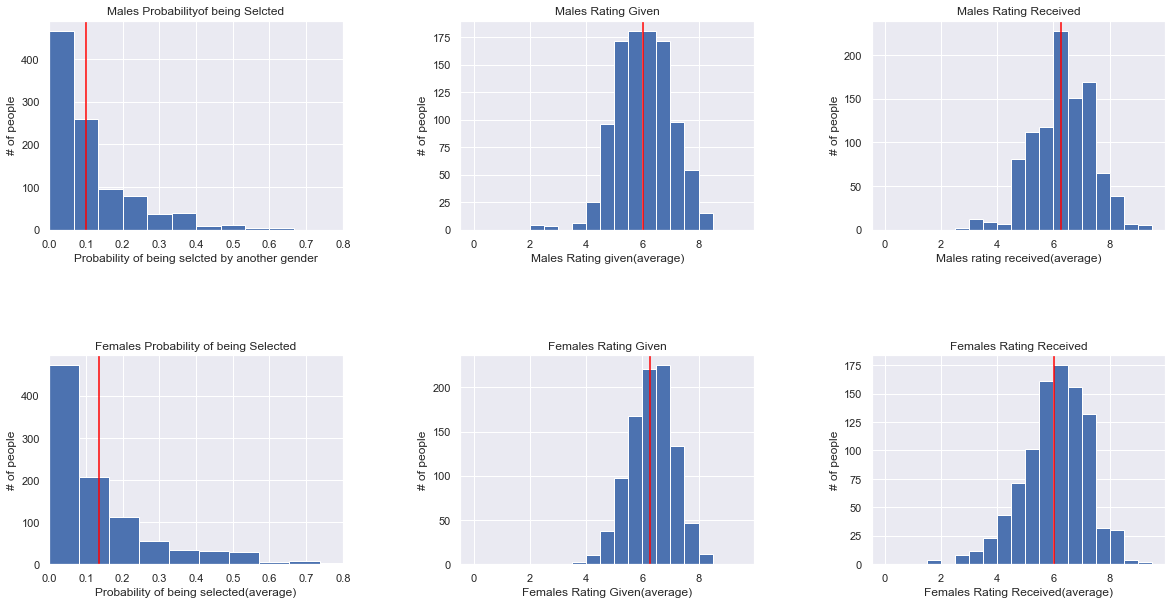

In [38]:
# visualization
plt.figure(figsize = [20, 10])
plt.subplots_adjust(wspace=0.4, hspace=0.6)
bin_edges = np.arange(0, 10 , 0.5)

plt.subplot(2, 3, 1)
plt.hist(df_grouped_iid_male["dec_o_prob"])
plt.title("Males Probabilityof being Selcted", fontsize=12)
plt.ylabel("# of people")
plt.xlabel("Probability of being selcted by another gender")
plt.axvline(df_grouped_iid_male["dec_o_prob"].mean(), color='red')
plt.xlim(0, 0.8)

plt.subplot(2, 3, 2)
basic_hist(df_grouped_iid_male["like_o"],"Males Rating given", "Males Rating Given")

plt.subplot(2, 3, 3)
basic_hist(df_grouped_iid_male["like"],"Males rating received", "Males Rating Received")

plt.subplot(2, 3, 4)
plt.hist(df_grouped_iid_female["dec_o_prob"])
plt.title("Females Probability of being Selected", fontsize=12)
plt.ylabel("# of people")
plt.xlabel("Probability of being selected(average)")
plt.axvline(df_grouped_iid_female["dec_o_prob"].mean(), color='red')
plt.xlim(0, 0.8)

plt.subplot(2, 3, 5)
basic_hist(df_grouped_iid_female["like_o"],"Females Rating Given", "Females Rating Given")

plt.subplot(2, 3, 6)
basic_hist(df_grouped_iid_female["like"],"Females Rating Received", "Females Rating Received")

In [19]:
# create df for different races
# Black=1, White=2,Latino=3,Asian=4,Native American=5, Other=6
df_grouped_iid_male_asian = df_grouped_iid_male[df_grouped_iid_male["race"] == 4]
df_grouped_iid_male_non_asian = df_grouped_iid_male[df_grouped_iid_male["race"] != 4]

## The Asian and non Asian males' probability of being selected by females

1. The proportion of the first (lefthand-most) bin is the biggest. 

2. The Asian Males' probability of being chosen by females(7%) is lower than that of non-Asian(10%)(P-value:0%)

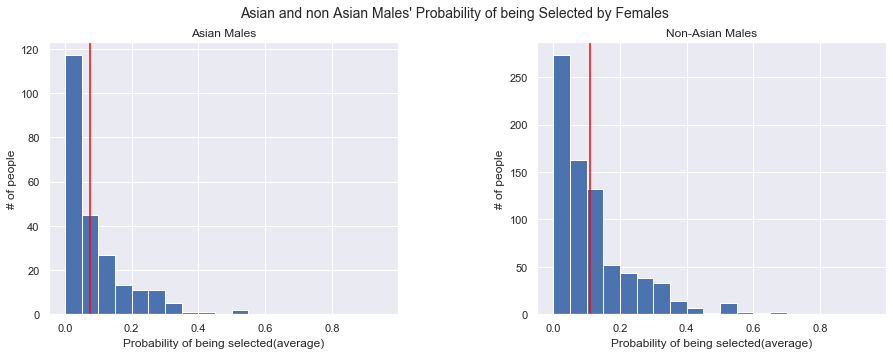

In [34]:
# visualization for Asian and non Asian
bin_edges = np.arange(0, 1 , 0.05)

plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace=0.4, hspace=0.3)

plt.suptitle("Asian and non Asian Males' Probability of being Selected by Females", fontsize=14)

plt.subplot(1, 2, 1)
basic_hist(df_grouped_iid_male_asian["dec_o_prob"],"Probability of being selected", "Asian Males")

plt.subplot(1, 2, 2)
basic_hist(df_grouped_iid_male_non_asian["dec_o_prob"],"Probability of being selected", "Non-Asian Males")

## The Asian and non Asian males' mean rating score received by females
1. The proportion of the bins less than 6 looks the biggest.
2. The Asian Males' mean rating received by females(6.1) is lower than that of non-Asian(6.3)(P-value:0%) (P-value:1%)

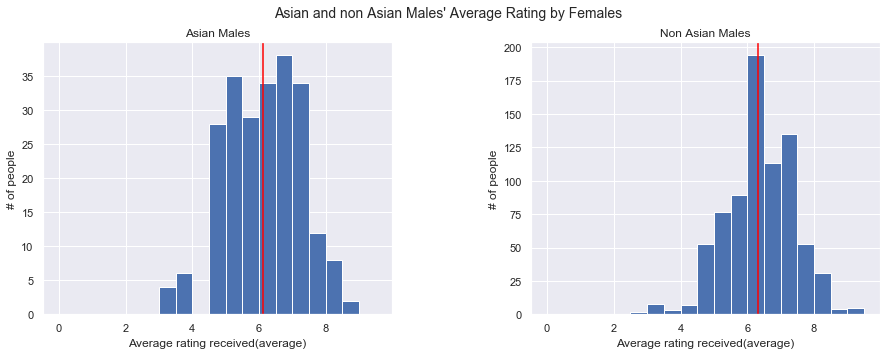

In [22]:
# visualization for Asian and non Asian
bin_edges = np.arange(0,10, 0.5)

plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.suptitle("Asian and non Asian Males' Average Rating by Females", fontsize=14)

plt.subplot(1, 2, 1)
basic_hist(df_grouped_iid_male_asian["like"],"Average rating received", "Asian Males")

plt.subplot(1, 2, 2)
basic_hist(df_grouped_iid_male_non_asian["like"],"Average rating received", "Non Asian Males")

In [23]:
# create Asian Males' table
df_logit= df[df["gender"] == 0]
df_logit= df_logit[df_logit["race_o"] == 4]

In [36]:
# extract attributes from the table
df_logit = df.drop(columns=["iid","pid","dec_o","race_o","gender"])
df_logit

,dec,race,samerace,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o
0,1,4,0,6,8,8,8,8,6,7
1,1,4,0,7,8,10,7,7,5,8
2,1,4,1,10,10,10,10,10,10,10
3,1,4,0,7,8,9,8,9,8,7
4,1,4,0,8,7,9,6,9,7,8
...,...,...,...,...,...,...,...,...,...,...
8373,0,2,0,10,5,3,2,6,5,6
8374,0,2,0,6,3,7,3,7,2,2
8375,0,2,0,2,1,2,2,2,1,2
8376,0,2,0,5,7,5,5,3,6,6


In [25]:
# extract the partners' race from the table to dummies columns
df_logit[['black','white','latino','asian','others']] = pd.get_dummies(df_logit['race'])
df_logit

,dec,race,samerace,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,black,white,latino,asian,others
0,1,4,0,6,8,8,8,8,6,7,0,0,0,1,0
1,1,4,0,7,8,10,7,7,5,8,0,0,0,1,0
2,1,4,1,10,10,10,10,10,10,10,0,0,0,1,0
3,1,4,0,7,8,9,8,9,8,7,0,0,0,1,0
4,1,4,0,8,7,9,6,9,7,8,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,0,2,0,10,5,3,2,6,5,6,0,1,0,0,0
8374,0,2,0,6,3,7,3,7,2,2,0,1,0,0,0
8375,0,2,0,2,1,2,2,2,1,2,0,1,0,0,0
8376,0,2,0,5,7,5,5,3,6,6,0,1,0,0,0


In [26]:
# create tables for the White partner and Asian partner for 
# further analysis since they are the two major ethnic group
df_logit_white = df_logit[df_logit["race"] == 2] 
df_logit_asian = df_logit[df_logit["race"] == 4] 
df_logit_white['intercept'] = 1
df_logit_asian['intercept'] = 1

In [27]:
# define a function for visualization
def log_regplot(data, y, x, y_name, x_name):
    sns.regplot(data=data, y= y , x= x,color=base_color,logistic=True, scatter_kws = {'alpha' : 1/5})
    plt.title('Asian Males '+str(x_name)+' Rating\n and '+str(y_name))
    plt.xlabel(str(x_name)+' Rating')
    plt.ylabel("Yes(1) or No(0)")

## The logistic regression of Asian males attribute ratings and decisions by White Females
1. There is no attribute that has a higher coefficient for white females.
2. Attractive rating and the decision of the partner is negatively correlated

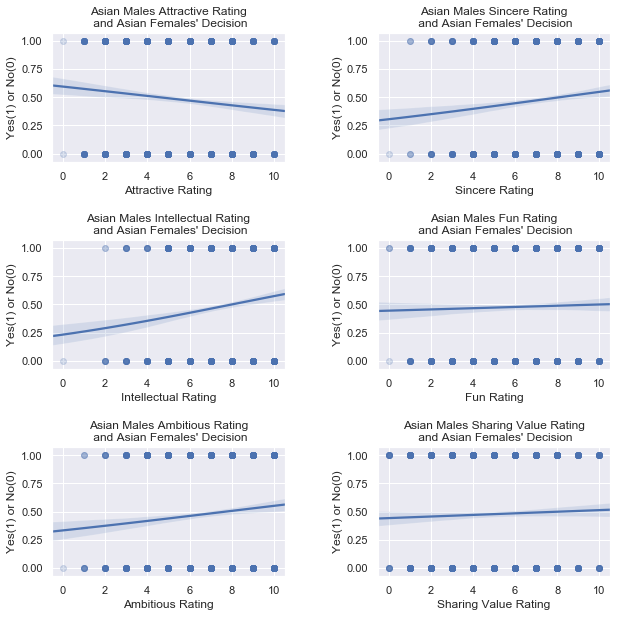

In [28]:
# visualize the logistic regression of Asian Males attributes rating by Asian Females
plt.figure(figsize = [10, 10])
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(3, 2, 1)
log_regplot(df_logit_asian, df_logit_asian['dec'], df_logit_asian['attr_o'],
            "Asian Females' Decision", "Attractive")

plt.subplot(3, 2, 2)
log_regplot(df_logit_asian, df_logit_asian['dec'], df_logit_asian['sinc_o'],
            "Asian Females' Decision", "Sincere")


plt.subplot(3, 2, 3)
log_regplot(df_logit_asian, df_logit_asian['dec'], df_logit_asian['intel_o'],
            "Asian Females' Decision", "Intellectual")

plt.subplot(3, 2, 4)
log_regplot(df_logit_asian, df_logit_asian['dec'], df_logit_asian['fun_o'],
            "Asian Females' Decision", "Fun")

plt.subplot(3, 2, 5)
log_regplot(df_logit_asian, df_logit_asian['dec'], df_logit_asian['amb_o'],
            "Asian Females' Decision", "Ambitious")

plt.subplot(3, 2, 6)
log_regplot(df_logit_asian, df_logit_asian['dec'], df_logit_asian['shar_o'],
            "Asian Females' Decision", "Sharing Value")

## The logistic regression of Asian males attribute ratings and decisions by Asian Females
1. Sincere and intellectual have a higher coefficient than other attributes. 
2. Attractive rating and the decision of the partner is negatively correlated

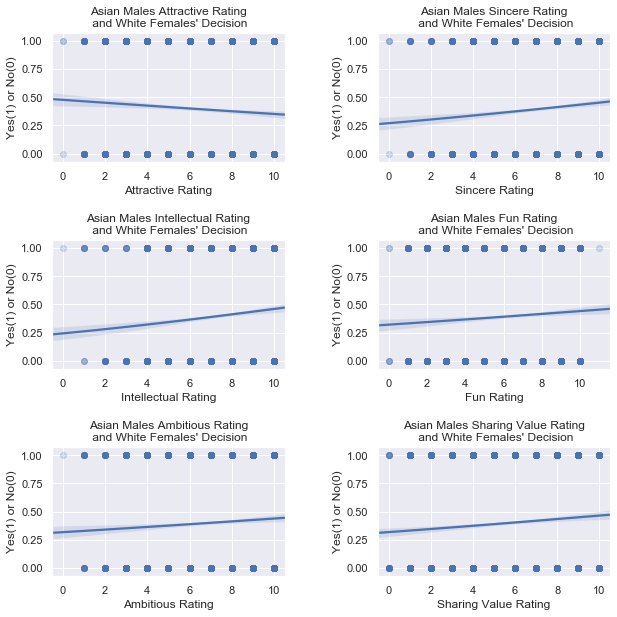

In [29]:
# visualize the logistic regression of Asian Males attributes rating by White Females
plt.figure(figsize = [10, 10])
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(3, 2, 1)
log_regplot(df_logit_white, df_logit_white['dec'], df_logit_white['attr_o'],
            "White Females' Decision", "Attractive")

plt.subplot(3, 2, 2)
log_regplot(df_logit_white, df_logit_white['dec'], df_logit_white['sinc_o'],
            "White Females' Decision", "Sincere")


plt.subplot(3, 2, 3)
log_regplot(df_logit_white, df_logit_white['dec'], df_logit_white['intel_o'],
            "White Females' Decision", "Intellectual")

plt.subplot(3, 2, 4)
log_regplot(df_logit_white, df_logit_white['dec'], df_logit_white['fun_o'],
            "White Females' Decision", "Fun")


plt.subplot(3, 2, 5)
log_regplot(df_logit_white, df_logit_white['dec'], df_logit_white['amb_o'],
            "White Females' Decision", "Ambitious")

plt.subplot(3, 2, 6)
log_regplot(df_logit_white, df_logit_white['dec'], df_logit_white['shar_o'],
            "White Females' Decision", "Sharing Value")